### RQ4（仮）Dockerfileに含まれるSATDは、file作成後からどれくらいの期間で追加されるのか？

In [1]:
from setting import PATH_OF_UNIQUE_SATD_INFO, PATH_OF_ALLPROJECT_CSV, PATH_OF_GITCLONE
from tqdm import tqdm
import os
import re
import pandas as pd
from datetime import datetime
import subprocess

In [2]:
df = pd.read_csv('9-allprojectCSV/result.csv', index_col=0)
df.head()

,project,gitPath,CommitID,Deleted CommitID,Author,Delete Author,LatestDockerfile,Comment,CommitDate,DeleteComment,(File) FirstCommit,(File) Deleted,firstCommitからコメント追加までの日数,コメント追加からコメント削除までの日数,追加時ファイル,削除時ファイル,(origin)追加時ファイル,(origin)SATD
315,wikimedia\nmediawiki-docker,https://github.com/wikimedia/mediawiki-docker,9bdcc59dc6ae7bf40eb7d23c6c0d3b133f174146,NaN,Marko Obrovac <marko.obrovac@gmail.com>,NaN,dev/Dockerfile,\t# Extensions\n\t# TODO: make submodules shal...,2017/12/21 02:20,NaN,2017/12/21 02:20,NaN,0:00:00,削除されていません,https://github.com/wikimedia/mediawiki-docker/...,NaN,https://github.com/wikimedia/mediawiki-docker/...,# Extensions\n # TODO: make submodules ...
313,wikimedia\nmediawiki-docker,https://github.com/wikimedia/mediawiki-docker,4b8cc73503e4fadd6f2b01eba840fa787a0d0ee3,b48d43686790d3497fec7a7607d640f9b8c43d67,Gabriel Wicke <gwicke@wikimedia.org>,David Barratt <dbarratt@wikimedia.org>,1.31/apache/Dockerfile,# Extensions\n # TODO: make submodules ...,2015/12/19 10:41,2017/08/05 02:00,2015/08/13 14:16,NaN,"127 days, 20:25:00","594 days, 15:19:00",https://github.com/wikimedia/mediawiki-docker/...,https://github.com/wikimedia/mediawiki-docker/...,https://github.com/wikimedia/mediawiki-docker/...,# VisualEditor\n # TODO: make submodule...
178,31z4\nzookeeper-docker,https://github.com/31z4/zookeeper-docker,15b6f73b9f36a8bf4960c661427ac41de49cf534,2ac61a0d18eb23c113c38a57380548a000768cb7,Duncan Schulze <duncan.schulze@sonian.net>,Duncan Schulze <dschulze@barracuda.com>,3.5.8/Dockerfile,# TODO: the distribution given by apache i...,2017/10/24 14:12,2018/06/01 00:36,2017/10/24 14:12,NaN,0 days 00:00:00.000000000,"219 days, 10:24:00",https://github.com/31z4/zookeeper-docker/commi...,https://github.com/31z4/zookeeper-docker/commi...,NaN,NaN
255,rocker-org\nrocker,https://github.com/rocker-org/rocker,a35c1df7e3dced0956cc4c33fd32ef71a443d8c4,1617fbefba8f6e7cdbbfcdfb6f77c5653249ecb2,Carl Boettiger <cboettig@gmail.com>,Carl Boettiger <cboettig@gmail.com>,rstudio/testing/Dockerfile,## hack to avoid RStudio-bug in detecting bu...,2016/12/22 03:57,2016/12/23 00:55,2016/11/12 15:45,NaN,39 days 12:12:00.000000000,20:58:00,https://github.com/rocker-org/rocker/commit/a3...,https://github.com/rocker-org/rocker/commit/16...,NaN,NaN
347,tianon\ndockerfiles,https://github.com/tianon/dockerfiles,03c351859fd6a80d65ee4a35a4bb71d7510a6041,a7893ff62f7951e2040665565bcf34fce213cde5,Tianon Gravi <admwiggin@gmail.com>,Tianon Gravi <admwiggin@gmail.com>,nylas/sync-engine/Dockerfile,# TODO inbox-api or inbox-start,2016/01/29 08:18,2019/06/25 13:10,2016/01/29 08:18,2019/06/25 13:10,0 days 00:00:00.000000000,ファイル削除,https://github.com/tianon/dockerfiles/commit/0...,https://github.com/tianon/dockerfiles/commit/a...,NaN,NaN


In [3]:
def daterange_to_minute(d):
    if "days," in d:
        days_time = d.split(" days, ")
        days = days_time[0]
        time = days_time[1].split(":")
        return int(days)*24*60 + int(time[0])*60 + int(time[1])
    elif "day," in d:
        days_time = d.split(" day, ")
        days = days_time[0]
        time = days_time[1].split(":")
        return int(days)*24*60 + int(time[0])*60 + int(time[1])
    elif "days" in d:
        days_time = d.split(" days ")
        days = days_time[0]
        time = days_time[1].split(":")
        return int(days)*24*60 + int(time[0])*60 + int(time[1])
    else:
        time = d.split(":")
        return int(time[0])*60 + int(time[1])
    
    
df["firstCommitからコメント追加までの日数"] = df["firstCommitからコメント追加までの日数"].apply(lambda dt: daterange_to_minute(dt))

In [4]:
# 追加期間を保持する配列
added_terms = []

unique_satds = df["Comment"].unique()

for satd in unique_satds:
    tmp = df[df["Comment"] == satd]
    tmp = tmp.sort_values("firstCommitからコメント追加までの日数")
    added_terms.append(tmp.iloc[-1, :]["firstCommitからコメント追加までの日数"])

In [5]:
# 単位: minutes
added_terms

[0,
 184105,
 0,
 56892,
 0,
 1457070,
 2421038,
 2,
 0,
 0,
 0,
 2,
 329486,
 225518,
 327584,
 1773926,
 2657783,
 2441014,
 0,
 3286919,
 0,
 1688391,
 2438140,
 2198715,
 0,
 3488821,
 0,
 0,
 2,
 0,
 585028,
 0,
 0,
 956420,
 594457,
 0,
 235563,
 0,
 1229688,
 0,
 0,
 3051234,
 0,
 966399,
 0,
 0,
 2548612,
 789140,
 179544,
 0,
 205282,
 911458,
 1477145,
 2088,
 1477145,
 0,
 2279748,
 1792689,
 1701984,
 1477145,
 0,
 2718562,
 162998,
 2718562,
 2249195,
 250677,
 0,
 5,
 0,
 787519,
 1755516,
 2548612,
 2241929,
 198850,
 11373,
 0,
 0,
 0,
 0,
 995649,
 1707261,
 3051234,
 810372,
 0,
 0,
 33182,
 2438140,
 184105,
 2438140,
 3366082,
 207664,
 784888,
 784888,
 2371724,
 91932,
 1957956,
 0,
 18558,
 0,
 27220,
 38984,
 0,
 0,
 1670198,
 50387,
 1108635,
 789140,
 0,
 2189136,
 1448540,
 1357881,
 1341137,
 209749,
 876752,
 1448333,
 1914535,
 1913077,
 1913077,
 84664,
 188484,
 0,
 0,
 1859129,
 1357881,
 91932]

## グラフ化

In [6]:
import os, re
from IPython.display import display
import matplotlib.pyplot as plt
import numpy as np

In [7]:
added_terms_hour = list(map(lambda m: m//60, added_terms))

added_terms_day = list(map(lambda m: m//60//24, added_terms))

In [8]:
# 時間(hour)
term_hour_df = pd.DataFrame(added_terms_hour, columns=["追加されるまでの期間 (hour)"])
term_hour_df.describe()

,追加されるまでの期間 (hour)
count,125.000000
mean,14159.760000
std,16908.149059
min,0.000000
25%,0.000000
50%,3495.000000
75%,28139.000000
max,58147.000000


In [9]:
# 時間(day)
term_day_df = pd.DataFrame(added_terms_day, columns=["追加されるまでの期間 (day)"])
term_day_df.describe()

,追加されるまでの期間 (day)
count,125.000000
mean,589.616000
std,704.331103
min,0.000000
25%,0.000000
50%,145.000000
75%,1172.000000
max,2422.000000


### hour

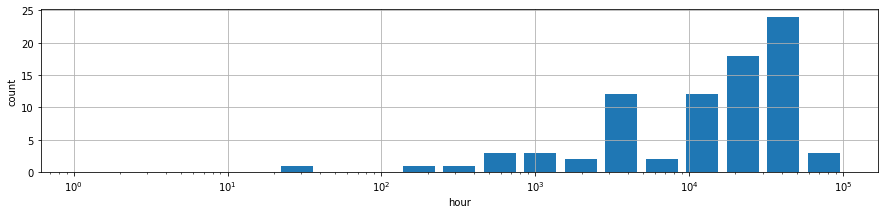

In [10]:
term_hour_df.hist(figsize=(15, 3), bins=np.logspace(0, 5, 20, base=10), rwidth=0.8);
plt.title('')
plt.ylabel('count')
plt.xlabel('hour')
plt.xscale('log')
plt.show()

### day

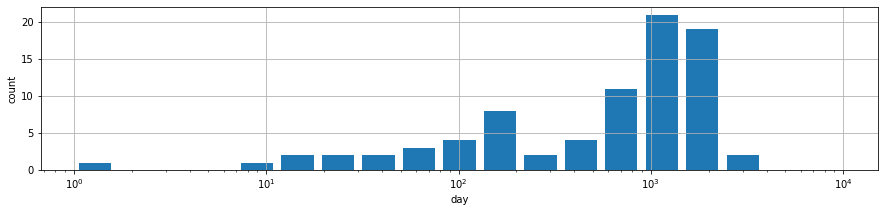

In [11]:
term_day_df.hist(figsize=(15, 3), bins=np.logspace(0, 4, 20, base=10), rwidth=0.8);
plt.title('')
plt.ylabel('count')
plt.xlabel('day')
plt.xscale('log')
plt.show()